In [1]:
"""

Dataset from: https://lhncbc.nlm.nih.gov/publication/pub9932

Binary problem:
Question is: Is the image uninfected? If yes, probability is close to 1.
If no, the probablility is close to 0.

This is because we added label 1 to uninfected images. 
In summary, probability result close to 1 reflects uninfected image
and close to 0 reflects parasitized image

"""


##########################################################
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.style.use('classic')
#############################################################
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Activation, Dropout, Flatten, Dense
#from keras import backend as K
####################################################
import os
import cv2
from PIL import Image
import numpy as np


In [2]:
# Load data

image_directory = 'D:\Programming\Python\Data\cell_images\\'
SIZE = 150
dataset = []  # Many ways to handle data, you can use pandas. Here, we are using a list format.  
label = []  # Place holders to define add labels. We will add 0 to all parasitized images and 1 to uninfected.

parasitized_images = os.listdir(image_directory + 'Parasitized/')
for i, image_name in enumerate(parasitized_images):    # Remember enumerate method adds a counter and returns the enumerate object
    
    if (image_name.split('.')[1] == 'png'):
        image = cv2.imread(image_directory + 'Parasitized/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(0)


FileNotFoundError: [WinError 3] 系統找不到指定的路徑。: 'D:\\Programming\\Python\\Data\\cell_images\\Uninfected/'

In [3]:
# Iterate through all images in Uninfected folder, resize to 64 x 64
# Then save into the same numpy array 'dataset' but with label 1

uninfected_images = os.listdir(image_directory + 'PNoninfected/')
for i, image_name in enumerate(uninfected_images):
    if (image_name.split('.')[1] == 'png'):
        image = cv2.imread(image_directory + 'PNoninfected/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(1)

dataset = np.array(dataset)
label = np.array(label)


In [4]:
from sklearn.model_selection import train_test_split
# from keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(dataset, label, test_size = 0.20, random_state = 0)

# Without scaling (normalize) the training may not converge. 
# Normalization is a rescaling of the data from the original range 
# so that all values are within the range of 0 and 1.

from keras.utils import normalize

X_train = normalize(X_train, axis=1)
X_test = normalize(X_test, axis=1)


In [5]:
# Model

INPUT_SHAPE = (SIZE, SIZE, 3)   #change to (SIZE, SIZE, 3)


model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=INPUT_SHAPE))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))  


In [6]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print(model.summary())    


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 72, 72, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                    

In [7]:
history = model.fit(X_train, 
                         y_train, 
                         batch_size = 64, 
                         verbose = 1, 
                         epochs = 10,      
                         validation_data=(X_test,y_test),
                         shuffle = False
                     )


Epoch 1/10
345/345 [==============================] - 404s 1s/step - loss: 0.4896 - accuracy: 0.7427 - val_loss: 0.2170 - val_accuracy: 0.9311
Epoch 2/10
345/345 [==============================] - 375s 1s/step - loss: 0.2069 - accuracy: 0.9479 - val_loss: 0.1826 - val_accuracy: 0.9463
Epoch 3/10
345/345 [==============================] - 379s 1s/step - loss: 0.1812 - accuracy: 0.9531 - val_loss: 0.1625 - val_accuracy: 0.9537
Epoch 4/10
345/345 [==============================] - 389s 1s/step - loss: 0.1654 - accuracy: 0.9559 - val_loss: 0.1594 - val_accuracy: 0.9528
Epoch 5/10
345/345 [==============================] - 392s 1s/step - loss: 0.1494 - accuracy: 0.9589 - val_loss: 0.1432 - val_accuracy: 0.9572
Epoch 6/10
345/345 [==============================] - 384s 1s/step - loss: 0.1370 - accuracy: 0.9607 - val_loss: 0.1436 - val_accuracy: 0.9566
Epoch 7/10
345/345 [==============================] - 375s 1s/step - loss: 0.1293 - accuracy: 0.9624 - val_loss: 0.1484 - val_accuracy: 0.9585

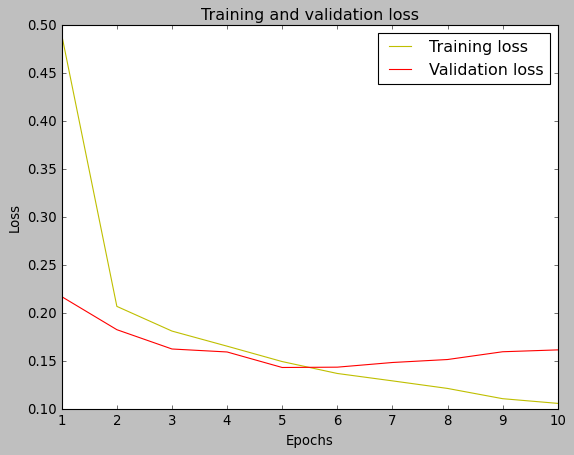

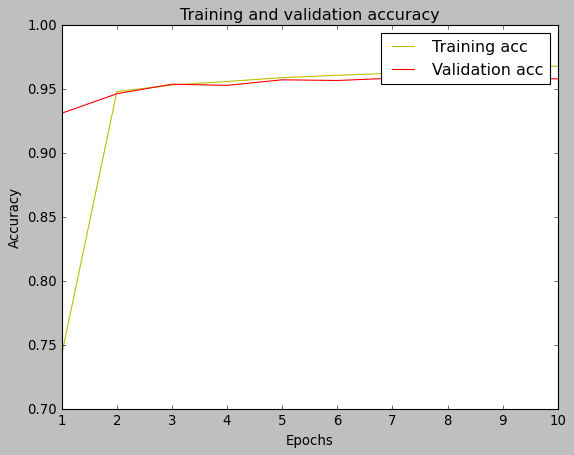

In [8]:
# plot the training and validation accuracy and loss
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


1/1 [==============================] - 0s 62ms/step
The prediction for this image is:  [[2.2131379e-10]]
The actual label for this image is:  0


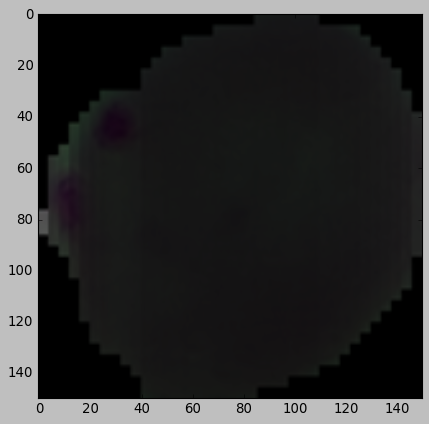

In [19]:
n=0  # Select the index of image to be loaded for testing
img = X_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
print("The prediction for this image is: ", model.predict(input_img))
print("The actual label for this image is: ", y_test[n])


In [20]:
_, acc = model.evaluate(X_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")


173/173 [==============================] - 21s 123ms/step - loss: 0.1616 - accuracy: 0.9579
Accuracy =  95.79100012779236 %


In [21]:
#How do we know how it is doing for parasitized vs uninfected? 
################################################################

#Confusion matrix
#We compare labels and plot them based on correct or wrong predictions.
#Since sigmoid outputs probabilities we need to apply threshold to convert to label.

mythreshold=0.908
from sklearn.metrics import confusion_matrix

y_pred = (model.predict(X_test)>= mythreshold).astype(int)
cm=confusion_matrix(y_test, y_pred)  
print(cm)


173/173 [==============================] - 21s 121ms/step
[[2637   66]
 [ 334 2475]]


173/173 [==============================] - 21s 123ms/step


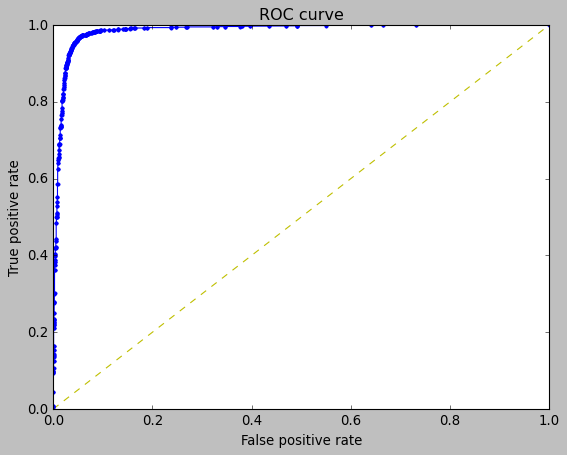

In [22]:
#Check the confusion matrix for various thresholds. Which one is good?
#Need to balance positive, negative, false positive and false negative. 
#ROC can help identify the right threshold.
##################################################################
"""
Receiver Operating Characteristic (ROC) Curve is a plot that helps us 
visualize the performance of a binary classifier when the threshold is varied. 
"""
#ROC
from sklearn.metrics import roc_curve
y_preds = model.predict(X_test).ravel()

fpr, tpr, thresholds = roc_curve(y_test, y_preds)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'y--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()


In [23]:
"""
#One way to find the best threshold once we calculate the true positive 
and false positive rates is ...
The optimal cut off point would be where ?rue positive rate??is high 
and the ?alse positive rate??is low. 
Based on this logic let us find the threshold where tpr-(1-fpr) is zero (or close to 0)
"""
import pandas as pd
i = np.arange(len(tpr)) 
roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'thresholds' : pd.Series(thresholds, index=i)})
ideal_roc_thresh = roc.iloc[(roc.tf-0).abs().argsort()[:1]]  #Locate the point where the value is close to 0
print("Ideal threshold is: ", ideal_roc_thresh['thresholds']) 

#Now use this threshold value in the confusion matrix to visualize the balance
#between tp, fp, fp, and fn


#AUC
#Area under the curve (AUC) for ROC plot can be used to understand hpw well a classifier 
#is performing. 
#% chance that the model can distinguish between positive and negative classes.

from sklearn.metrics import auc
auc_value = auc(fpr, tpr)
print("Area under curve, AUC = ", auc_value)


#########################################

Ideal threshold is:  256    0.646909
Name: thresholds, dtype: float32
Area under curve, AUC =  0.9856946654344348
